# This is to explore animation and interaction with matplotlib

#### Let's go over a heat conduction experiment

For the 2-dimensional thermal conduction problem we can assume a plate which has a unit length of 1 in both $x$ and $y$ directions and constant zero temperature is applied from the all 4 sides. Then we follow the same discretization logic. The thermal distribution in this case can be written as:

$$\frac{\partial u }{\partial t} = \kappa^2 \Delta u $$

with:

$$\Delta u = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} $$

If we are doing the same discretization with $N$ parts in $x$ and $y$ we can write our simulation equation now for any part with the indicess $i$ and $j$:

$$ u_{t+\Delta t,i,j} = u_{t,i,j} + \Delta t \cdot \kappa^2 \frac{u_{t,i-1,j} + u_{t,i+1,j} -4 u_{t,i,j}  + u_{t,i,j-1} + u_{t,i,j+1}}{h^2} $$

The boundary conditions are now $u_{t,0,j} = u_{t,N-1,j} = u_{t,i,0} = u_{t,i,N-1} = 0$.


The limits of the simulation can be given for a proper $\Delta t < \frac{h^2}{2\kappa^2}$.

we can define one initial condition:

$$u(x,y,0) = \sin(\pi x) \sin(\pi y) $$ for which we know the exact solution:

$$u(x,y, t) = \sin(\pi x)\sin(\pi y) \textrm{e}^{-\kappa^2 \pi^2 t}$$


#### Let's see how the mesh works

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

vector = np.arange(1,11)                           # create a 1d vector with the numbers from 1 to 10
# extend the vectors to a meshgrid
xx, yy = np.meshgrid(vector, vector)

print(xx)                                          # 10 x 10 version of x vector
print(yy)                                          # Notice for yy it is the transpose of these values

# multiply both vectors
matrix = xx * yy
print(matrix)

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]]
[[ 1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4]
 [ 5  5  5  5  5  5  5  5  5  5]
 [ 6  6  6  6  6  6  6  6  6  6]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 8  8  8  8  8  8  8  8  8  8]
 [ 9  9  9  9  9  9  9  9  9  9]
 [10 10 10 10 10 10 10 10 10 10]]
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72

In [6]:
def init_heat_grid(heat_grid, points):
    for p in points:
        # layout of the points are: x, y, value
        # be careful, the first index of the array correspond to y!
        if (p[0] > 0) and (p[0]<heat_grid.shape[1]-1) and (p[1] > 0) and (p[1]<heat_grid.shape[0]-1):
            heat_grid[p[1], p[0]] = p[2]

def update_time_points(heat_grid, kappa, deltat, points):
    update_time(heat_grid, kappa, deltat)
    init_heat_grid(heat_grid, points)

Lets see non-animated case, after thermal equilibrium is established

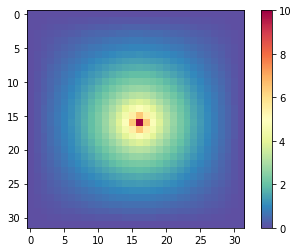

In [7]:
N = 32
heat_grid = np.zeros((N,N), dtype=np.float64)

points = [[N//2,N//2,10]]   # setup one point on the central point with value 10

init_heat_grid(heat_grid, points)

kappa = 1
deltat = 0.0001

delta_change = 1.
count = 0
while (delta_change > 1e-4):
    prev_grid = heat_grid.copy()
    update_time_points(heat_grid,  kappa, deltat, points)
    
    delta_change = (heat_grid - prev_grid).sum()
    count = count + 1
    
# print(f'The simulation converge after: {count} iterations')
# print(delta_change)

plt.imshow(heat_grid, cmap='Spectral_r')
plt.colorbar();

Now lets see this for 4 heat sources

In [8]:
from IPython.display import clear_output

def animate_frame(framenr, heat_grid, kappa, deltat, points):
    """
    animate_frame
    
    is creating a single frame of the animation, it clears the widget in the begininng and needs
    a plt.show() in the end for the actual plotting and updating the heat according to the 
    parameters!
    
    It uses all plt-elemets as usual for creating a plot!
    """
    clear_output(wait=True)                 # clears the widget
    plt.figure(figsize=(7,7))               # a bigger size
    plt.title(f'heatmap {framenr+1}')       # title
    plt.imshow(heat_grid, cmap='Spectral_r', vmin=0)    # the heat grid
    plt.colorbar()                          # the colorbar
    plt.show();                             # plot it
    
    # at the end update the grid
    update_time_points(heat_grid, kappa, deltat, points)


# initial point setup
points = [[N//3,N//2,10], [2*N//3,N//2,10]]
points = [[7*N//15,7*N//15,10], [8*N//15,7*N//15,10],
          [7*N//15,8*N//15,10], [8*N//15,8*N//15,10]
         ]

# setup the heat grid
heat_grid = np.zeros((N,N), dtype=np.float64)
init_heat_grid(heat_grid, points)             # setup the sources

# the parameters of the simulation

# kappa = 1
# deltat = 0.001
kappa = 1.
deltat= 0.0002

For this animation, we simply plot, wait and clear the figure and plot the next one on top of it.

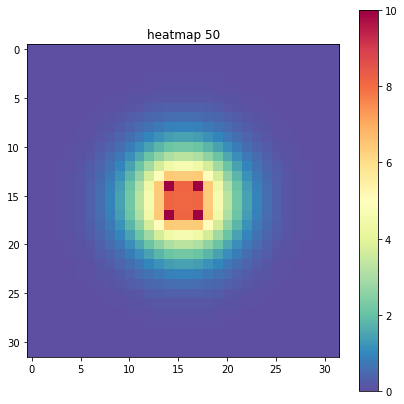

0.00858200380854533


In [9]:
# run the animation in a loop
for i in range(50):
    prev_grid = heat_grid.copy()
    animate_frame(i, heat_grid, kappa, deltat, points)
    delta_change = (heat_grid - prev_grid).mean()
    print(delta_change)

We can use different animation techniques as well.

In [10]:
from matplotlib import animation

MovieWriter ffmpeg unavailable; using Pillow instead.


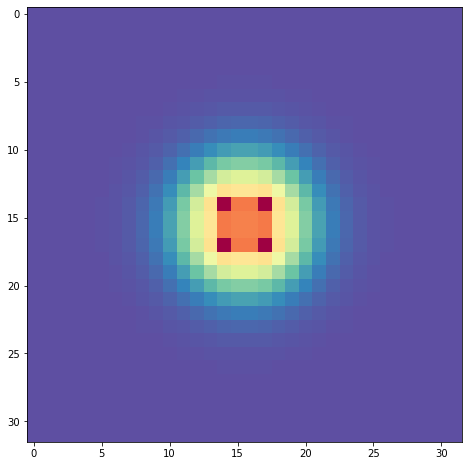

In [39]:
heat_grid = np.zeros((N,N), dtype=np.float64)

def animate(i):
    update_time_points(heat_grid, kappa, deltat, points)
    ax.imshow(heat_grid, cmap='Spectral_r', vmin=0)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.imshow(heat_grid, cmap='Spectral_r', vmin=0)
anim = animation.FuncAnimation(fig, animate, 
                               frames=30, interval=10)

anim.save('test1.gif')

To display on the jupyter notebook we can use HTML

In [40]:
from IPython.display import HTML

In [41]:
heat_grid = np.zeros((N,N), dtype=np.float64)
HTML(anim.to_jshtml())

Go [here](interactive_practice) for the interactive plotting exercise.